# Function manipulation

In this example we are going to exhibit some of the main function methods.


In [1]:
from __future__ import print_function
import openturns as ot
import math as m

In [2]:
# Create a vectorial function R ^n --> R^p
# for example R^2 --> R^2
f = ot.SymbolicFunction(['x1', 'x2'], ['1+2*x1+x2', '2+x1+2*x2'])

# Create a scalar function R --> R
func1 = ot.SymbolicFunction(['x'], ['x^2'])

# Create another function R^2 --> R
func2 = ot.SymbolicFunction(['x', 'y'], ['x*y'])

# Create a vectorial function R ^3 --> R^2
func3 = ot.SymbolicFunction(['x1', 'x2', 'x3'], ['1+2*x1+x2+x3^3', '2+sin(x1+2*x2)-sin(x3) * x3^4'])

# Create a second vectorial function R ^n --> R^p
# for example R^2 --> R^2
g = ot.SymbolicFunction(['x1', 'x2'], ['x1+x2', 'x1^2+2*x2^2'])


def python_eval(X):
    a, b = X
    y = a+b
    return [y]
func4 = ot.PythonFunction(2, 1, python_eval)

In [3]:
# Ask for the dimension of the input and output vectors
print(f.getInputDimension())
print(f.getOutputDimension())

2
2


In [4]:
# Enable the history mechanism
f.enableHistory()

In [5]:
# Evaluate the function at a particular point
x = [1.0] * f.getInputDimension()
y = f(x)
print('x=', x, 'y=', y)

x= [1.0, 1.0] y= [4,5]


In [6]:
# Get the history
samplex = f.getHistoryInput().getSample()
sampley = f.getHistoryOutput().getSample()
print('evaluation history = ', samplex,  sampley)

evaluation history =  0 : [ 1 1 ] 0 : [ 4 5 ]


In [7]:
# Disable the history mechanism
f.disableHistory()

In [8]:
# Enable the cache mecanism
func4.enableCache()
for i in range(10):
    func4(x)

In [9]:
# Get the number of times cached values are reused
func4.getCacheHits()

9

In [10]:
# Evaluate the gradient of the function at a particular point
gradientMatrix = f.gradient(x)
gradientMatrix

class=Matrix implementation=class=MatrixImplementation name=Unnamed rows=2 columns=2 values=[2,1,1,2]

In [11]:
# Evaluate the hessian of the function at a particular point
hessianMatrix = f.hessian(x)
hessianMatrix

class=SymmetricTensor implementation=class=TensorImplementation name=Unnamed rows=2 columns=2 sheets=2 values=[0,0,0,0,0,0,0,0]

In [12]:
# Change the gradient method to a non centered finite difference method
step = [1e-7] * f.getInputDimension()
gradient = ot.NonCenteredFiniteDifferenceGradient(step, f.getEvaluation())
f.setGradient(gradient)
gradient

class=NonCenteredFiniteDifferenceGradient name=Unnamed epsilon=class=Point name=Unnamed dimension=2 values=[1e-07,1e-07] evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x1,x2] outputVariablesNames=[y0,y1] formulas=[1+2*x1+x2,2+x1+2*x2]

In [13]:
# Change the hessian method to a centered finite difference method
step = [1e-7] * f.getInputDimension()
hessian = ot.CenteredFiniteDifferenceHessian(step, f.getEvaluation())
f.setHessian(hessian)
hessian

class=CenteredFiniteDifferenceHessian name=Unnamed epsilon=class=Point name=Unnamed dimension=2 values=[1e-07,1e-07] evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x1,x2] outputVariablesNames=[y0,y1] formulas=[1+2*x1+x2,2+x1+2*x2]

In [14]:
# Get the number of times the function has been evaluated
f.getEvaluationCallsNumber()

1

In [15]:
# Get the number of times the gradient has been evaluated
f.getGradientCallsNumber()

0

In [16]:
# Get the number of times the hessian has been evaluated
f.getHessianCallsNumber()

0

In [17]:
# Get the component i
f.getMarginal(1)

class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[x1,x2,y1] evaluationImplementation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x1,x2] outputVariablesNames=[y1] formulas=[2+x1+2*x2] gradientImplementation=class=ComposedGradient name=Unnamed leftGradient=class=ConstantGradient name=Unnamed constant=class=Matrix implementation=class=MatrixImplementation name=Unnamed rows=2 columns=1 values=[0,1] rightFunction=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x0,x1] outputVariablesNames=[y0,y1] formulas=[0.0,0.0] rightGradient=class=NonCenteredFiniteDifferenceGradient name=Unnamed epsilon=class=Point name=Unnamed dimension=2 values=[1e-07,1e-07] evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x1,x2] outputVariablesNames=[y0,y1] formulas=[1+2*x1+x2,2+x1+2*x2] hessianImplementation=class=ComposedHessian name=Unnamed leftGradient=class=ConstantGradient name=Unnamed constant=class=Matrix implementation=class=MatrixImplementation name=Unnamed rows=2 columns=1 values=[0,1] leftHessian=class=ConstantHessian name=Unnamed constant=class=SymmetricTensor implementation=class=TensorImplementation name=Unnamed rows=2 columns=2 sheets=1 values=[0,0,0,0] rightFunction=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x0,x1] outputVariablesNames=[y0,y1] formulas=[0.0,0.0] rightGradient=class=ConstantGradient name=Unnamed constant=class=Matrix implementation=class=MatrixImplementation name=Unnamed rows=2 columns=2 values=[0,0,0,0] rightHessian=class=CenteredFiniteDifferenceHessian name=Unnamed epsilon=class=Point name=Unnamed dimension=2 values=[1e-07,1e-07] evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x1,x2] outputVariablesNames=[y0,y1] formulas=[1+2*x1+x2,2+x1+2*x2]

In [18]:
# Compose two functions : h = f o g
ot.ComposedFunction(f, g)

class=ComposedFunction name=Unnamed description=[x1,x2,y0,y1] left function=class=FunctionImplementation name=Unnamed description=[x1,x2,y0,y1] evaluationImplementation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x1,x2] outputVariablesNames=[y0,y1] formulas=[1+2*x1+x2,2+x1+2*x2] gradientImplementation=class=NonCenteredFiniteDifferenceGradient name=Unnamed epsilon=class=Point name=Unnamed dimension=2 values=[1e-07,1e-07] evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x1,x2] outputVariablesNames=[y0,y1] formulas=[1+2*x1+x2,2+x1+2*x2] hessianImplementation=class=CenteredFiniteDifferenceHessian name=Unnamed epsilon=class=Point name=Unnamed dimension=2 values=[1e-07,1e-07] evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x1,x2] outputVariablesNames=[y0,y1] formulas=[1+2*x1+x2,2+x1+2*x2] right function=class=FunctionImplementation name=Unnamed description=[x1,x2,y0,y1] evaluationImplementation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x1,x2] outputVariablesNames=[y0,y1] formulas=[x1+x2,x1^2+2*x2^2] gradientImplementation=class=SymbolicGradient name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x1,x2] outputVariablesNames=[y0,y1] formulas=[x1+x2,x1^2+2*x2^2] hessianImplementation=class=SymbolicHessian name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x1,x2] outputVariablesNames=[y0,y1] formulas=[x1+x2,x1^2+2*x2^2]

In [19]:
# Get the valid symbolic constants
ot.SymbolicFunction.GetValidConstants()

[_e -> Euler's constant (2.71828...),_pi -> Pi constant (3.14159...)]

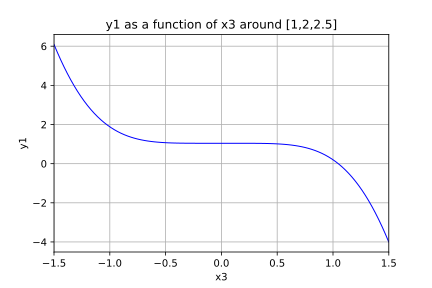

In [20]:
# Graph 1 : z -->  f_2(x_0,y_0,z)
# for z in [-1.5, 1.5] and y_0 = 2. and z_0 = 2.5
# Specify the input component that varies
# Care : numerotation begins at 0
inputMarg = 2
# Give its variation intervall
zMin = -1.5
zMax = 1.5
# Give the coordinates of the fixed input components
centralPt = [1.0, 2.0, 2.5]
# Specify the output marginal function
# Care : numerotation begins at 0
outputMarg = 1
# Specify the point number of the final curve
ptNb = 101
# Draw the curve!
func3.draw(inputMarg, outputMarg, centralPt, zMin, zMax, ptNb)

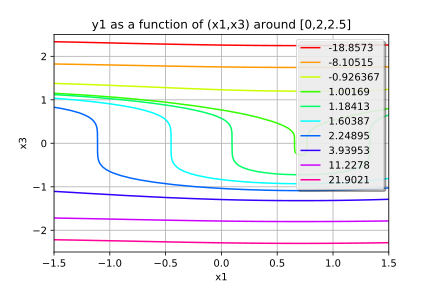

In [21]:
# Graph 2 : (x,z) -->  f_1(x,y_0,z)
# for x in [-1.5, 1.5], z in [-2.5, 2.5]
# and y_0 = 2.5
# Specify the input components that vary
firstInputMarg = 0
secondInputMarg = 2
# Give their variation interval
inputMin2 = [-1.5, -2.5]
inputMax2 = [1.5, 2.5]
# Give the coordinates of the fixed input components
centralPt = [0.0, 2., 2.5]
# Specify the output marginal function
outputMarg = 1
# Specify the point number of the final curve
ptNb = [101, 101]
func3.draw(firstInputMarg, secondInputMarg,
           outputMarg, centralPt, inputMin2, inputMax2, ptNb)

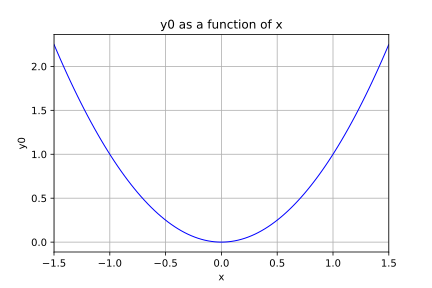

In [22]:
# Graph 3 : simplified method for x -->  func1(x)
# for x in [-1.5, 1.5]
# Give the variation interval
xMin3 = -1.5
xMax3 = 1.5
# Specify the point number of the final curve
ptNb = 101
# Draw the curve!
func1.draw(xMin3, xMax3, ptNb)

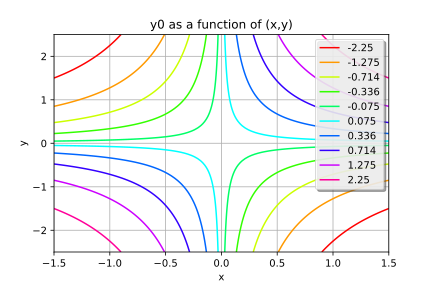

In [23]:
# Graph 4 : (x,y) -->  func2(x,y)
# for x in [-1.5, 1.5], y in [-2.5, 2.5]
# Give their variation interval
inputMin4 = [-1.5, -2.5]
inputMax4 = [1.5, 2.5]
# Give the coordinates of the fixed input components
centralPt = [0.0, 2., 2.5]
# Specify the output marginal function
outputMarg = 1
# Specify the point number of the final curve
ptNb = [101, 101]
func2.draw(inputMin4, inputMax4, ptNb)